# Loading Libraries and Initialize

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 

# Reading data from CSV file and filtering Apple stock price 

In [2]:
allData = pd.read_csv('Data//all_stocks_5yr.csv', index_col=['date'], parse_dates=['date'])
df = allData[allData['Name'] == 'AAPL']

# Weighted Moving Average (WMA)
<img src="images/wma.png">
- Parameter 'weights' is a vector.
- Sum of all elements whould be 1.
- WMA is useful to understand the trend.

In [3]:
def weighted_moving_average(series, weights):
    n = len(weights)
    weighted_moving_aves = []
    for i in range(len(series)):
        if i >= n - 1:
            data = series[i - n + 1:i + 1]            
            weighted_moving_aves.append(np.dot(data, weights))
        else:
            weighted_moving_aves.append(None)
        
    return weighted_moving_aves

# Calculating Weighted Moving Average

In [4]:
weights = [.01,.01,.01,.01,.01,.02,.02,.02,.02,.02,.03,.03,.03,.03,.03,.05,.05,.05,.05,.05,.07,.08,.09,.10,.11]
df['wma'] = weighted_moving_average(df['close'], weights)
df.tail(10)

,open,high,low,close,volume,Name,wma
date,,,,,,,
2018-01-25,174.505,174.9500,170.5300,171.11,41529004,AAPL,175.1087
2018-01-26,172.000,172.0000,170.0600,171.51,39143011,AAPL,174.7246
2018-01-29,170.160,170.1600,167.0700,167.96,50640406,AAPL,173.9753
2018-01-30,165.525,167.3700,164.7000,166.97,46048185,AAPL,173.2435
2018-01-31,166.870,168.4417,166.5000,167.43,32478930,AAPL,172.6029
2018-02-01,167.165,168.6200,166.7600,167.78,47230787,AAPL,172.1417
2018-02-02,166.000,166.8000,160.1000,160.50,86593825,AAPL,170.9068
2018-02-05,159.100,163.8800,156.0000,156.49,72738522,AAPL,169.3630
2018-02-06,154.830,163.7200,154.0000,163.03,68243838,AAPL,168.6964


# Visualizing All Data

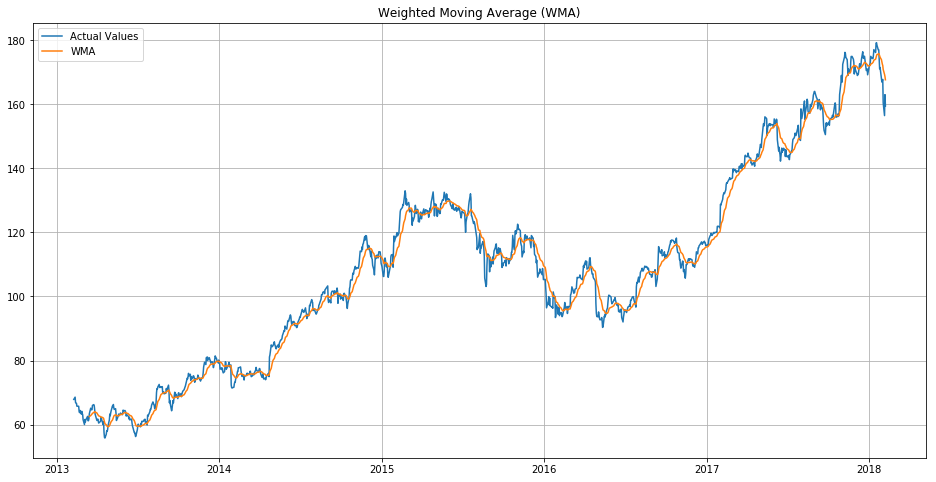

In [5]:
plt.figure(figsize=(16,8))
plt.title('Weighted Moving Average (WMA)')

plt.plot(df['close'], label='Actual Values')
plt.plot(df['wma'], label='WMA')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Visualizing Last 200 Days

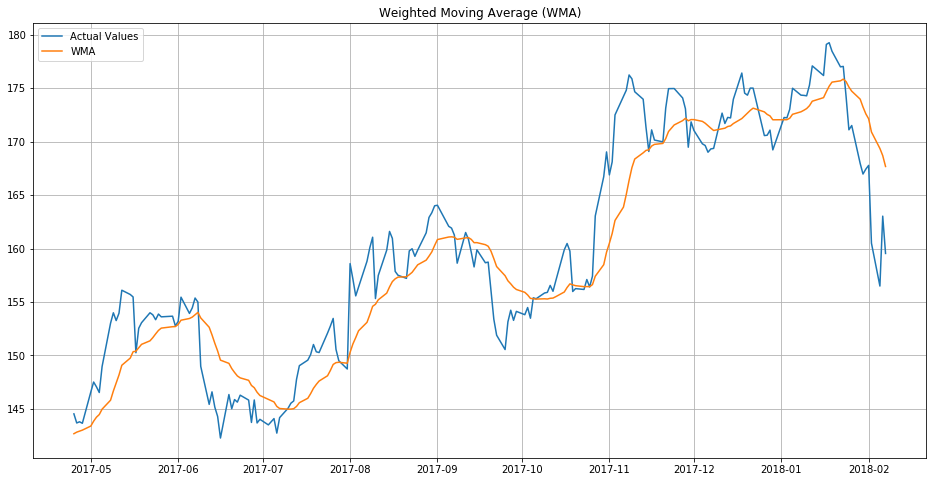

In [6]:
df = df[-200:]

plt.figure(figsize=(16,8))
plt.title('Weighted Moving Average (WMA)')

plt.plot(df['close'], label='Actual Values')
plt.plot(df['wma'], label='WMA')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()